In [3]:
import os

import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [4]:
DATAPATH = '/home/apbarret/src/SunlightUnderSeaIce/data'

In [5]:
!file /home/apbarret/src/SunlightUnderSeaIce/data/pstrack.dat

/home/apbarret/src/SunlightUnderSeaIce/data/pstrack.dat: ISO-8859 text


In [6]:
with open(os.path.join(DATAPATH, 'pstrack.dat'), encoding="ISO-8859-1") as f:
    lines = f.readlines()

In [7]:
for i, l in enumerate(lines[:10]):
    print(f"{i} - {l}")

0 - date time	SYS.STR.PosLat	SYS.STR.PosLon

1 - 	spot	spot

2 - 	°	°

3 - 2019/09/20 00:00:00	 	 

4 - 2019/09/20 01:00:00	 	 

5 - 2019/09/20 02:00:00	 	 

6 - 2019/09/20 03:00:00	 	 

7 - 2019/09/20 04:00:00	 	 

8 - 2019/09/20 05:00:00	 	 

9 - 2019/09/20 06:00:00	 	 



In [17]:
df = pd.read_csv(os.path.join(DATAPATH, 'pstrack.dat'), encoding="ISO-8859-1", sep="\t", header=0, 
                 skiprows=[1,2], parse_dates=['date time'], index_col='date time')
df.rename({"SYS.STR.PosLat": "Latitude", "SYS.STR.PosLon": "Longitude"}, axis="columns", inplace=True)
df.index.name = "datetime"
df = df.apply(pd.to_numeric, errors="coerce")
df = df.dropna()
df.head()

,Latitude,Longitude
datetime,,
2019-09-20 15:00:00,69.679548,18.996655
2019-09-20 16:00:00,69.679548,18.996648
2019-09-20 17:00:00,69.679545,18.996645
2019-09-20 18:00:00,69.679548,18.996640
2019-09-20 19:00:00,69.683804,19.025313


In [18]:
dfDay = df.resample('D').mean()

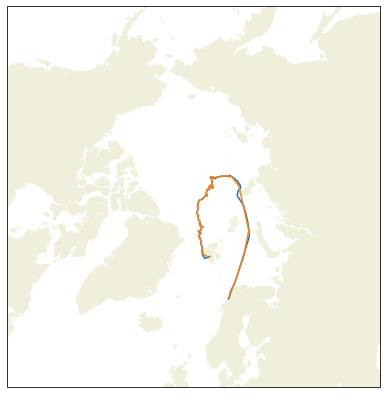

In [19]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180., 180., 55., 90.], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.plot(df["Longitude"], df["Latitude"], transform=ccrs.PlateCarree())
ax.plot(dfDay["Longitude"], dfDay["Latitude"], transform=ccrs.PlateCarree())

In [20]:
dfDay = dfDay.dropna()

From [Stefan Hendricks blog post](https://blogs.helmholtz.de/polarstern/en/2019/10/mapping-floes/), the Polarstern moored at the first floe on about 15 October 2019. 

In [21]:
dfDay_on_floe = dfDay['2019-10-15':]

In [22]:
dfDay_on_floe

,Latitude,Longitude
datetime,,
2019-10-15,84.762124,134.264965
2019-10-16,84.762223,133.522462
2019-10-17,84.755421,132.983380
2019-10-18,84.821243,133.133671
2019-10-19,84.935919,133.077173
...,...,...
2020-05-31,81.710422,9.821963
2020-06-01,81.333749,9.853240
2020-06-02,80.826408,9.754252


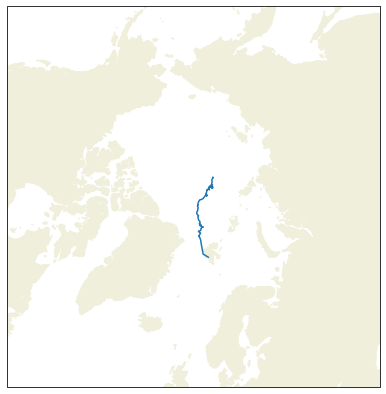

In [23]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180., 180., 55., 90.], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.plot(dfDay_on_floe["Longitude"], dfDay_on_floe["Latitude"], transform=ccrs.PlateCarree())

## Try using GeoPandas

In [24]:
import geopandas

In [25]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
gdf

,Latitude,Longitude,geometry
datetime,,,
2019-09-20 15:00:00,69.679548,18.996655,POINT (18.99666 69.67955)
2019-09-20 16:00:00,69.679548,18.996648,POINT (18.99665 69.67955)
2019-09-20 17:00:00,69.679545,18.996645,POINT (18.99665 69.67954)
2019-09-20 18:00:00,69.679548,18.996640,POINT (18.99664 69.67955)
2019-09-20 19:00:00,69.683804,19.025313,POINT (19.02531 69.68380)
...,...,...,...
2020-06-04 02:00:00,78.128537,13.531042,POINT (13.53104 78.12854)
2020-06-04 03:00:00,78.171624,14.076505,POINT (14.07650 78.17162)
2020-06-04 04:00:00,78.213993,14.621971,POINT (14.62197 78.21399)


<AxesSubplot:>

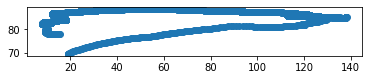

In [26]:
gdf.plot()

In [31]:
gdf.length

datetime
2019-09-20 15:00:00    0.0
2019-09-20 16:00:00    0.0
2019-09-20 17:00:00    0.0
2019-09-20 18:00:00    0.0
2019-09-20 19:00:00    0.0
                      ... 
2020-06-04 02:00:00    0.0
2020-06-04 03:00:00    0.0
2020-06-04 04:00:00    0.0
2020-06-04 05:00:00    0.0
2020-06-04 06:00:00    0.0
Length: 6184, dtype: float64

In [32]:
gdf.resample?

Signature:
gdf.resample(
    rule,
    axis=0,
    closed: Union[str, NoneType] = None,
    label: Union[str, NoneType] = None,
    convention: str = 'start',
    kind: Union[str, NoneType] = None,
    loffset=None,
    base: Union[int, NoneType] = None,
    on=None,
    level=None,
    origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day',
    offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time
series. Object must have a datetime-like index (`DatetimeIndex`,
`PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
to the `on` or `level` keyword.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
   